Project 2 - Advanced Machine Learning -
Henri de Montalembert -
Johann de Soyres

In [0]:
import pandas as pd
import missingno as msno 
%matplotlib inline

## Get responses and fill NaN

In [0]:
#df = pd.read_csv("ORGANISATION_DE_LETAT_ET_DES_SERVICES_PUBLICS.csv")
df = pd.read_csv("http://opendata.auth-6f31f706db6f4a24b55f42a6a79c5086.storage.sbg5.cloud.ovh.net/2019-02-06/LA_TRANSITION_ECOLOGIQUE.csv")
df_bis = df.copy()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
pd.DataFrame(df['authorZipCode'].value_counts()[:10])

,authorZipCode
75015,326
35000,215
31000,207
44000,196
75017,195
33000,187
75011,181
75018,170
67000,167
21000,161


In [0]:
df_zip = df
for i , val in enumerate(df_zip["authorZipCode"]):
  df_zip["authorZipCode"][i] = str(val)[:2]
pd.DataFrame(df_zip['authorZipCode'].value_counts()[:10])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,authorZipCode
75,2573
69,1902
13,1683
31,1625
92,1562
33,1521
78,1518
38,1293
44,1213
59,1119


In [0]:
pd.DataFrame(df_zip['authorZipCode'].value_counts()).reset_index().to_csv("df_zip.csv")

On remarque que les citoyens viennent principalement de Paris et plus précisement des plus grosses villes 

In [0]:
pd.DataFrame(df['authorType'].value_counts()[:10])

,authorType
Citoyen / Citoyenne,44716
Élu / élue et Institution,458
Organisation à but non lucratif,179
Organisation à but lucratif,52


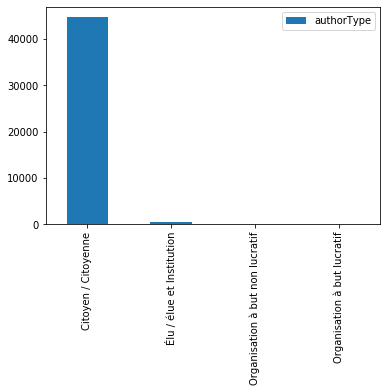

In [0]:
pd.DataFrame(df['authorType'].value_counts()[:10]).plot(kind="bar")

In [0]:
#Number of unique author 
print(len(df))
print(len(df['authorId'].unique()))

47288
42968


In [0]:

#df['authorId'].value_counts()
#df['authorType'].value_counts()
df['title'].value_counts()[:10]

Ecologie                 398
Transition écologique    305
Environnement            206
ecologie                 146
transition écologique    127
écologie                 122
environnement            110
Écologie                 102
Pollution                 89
pollution                 80
Name: title, dtype: int64

In [0]:
# on vérifie s'il y a des nan
df.isnull().sum()

reference                                                                                                                                                                                                                                                  0
title                                                                                                                                                                                                                                                      0
createdAt                                                                                                                                                                                                                                                  0
publishedAt                                                                                                                                                                                                                                      

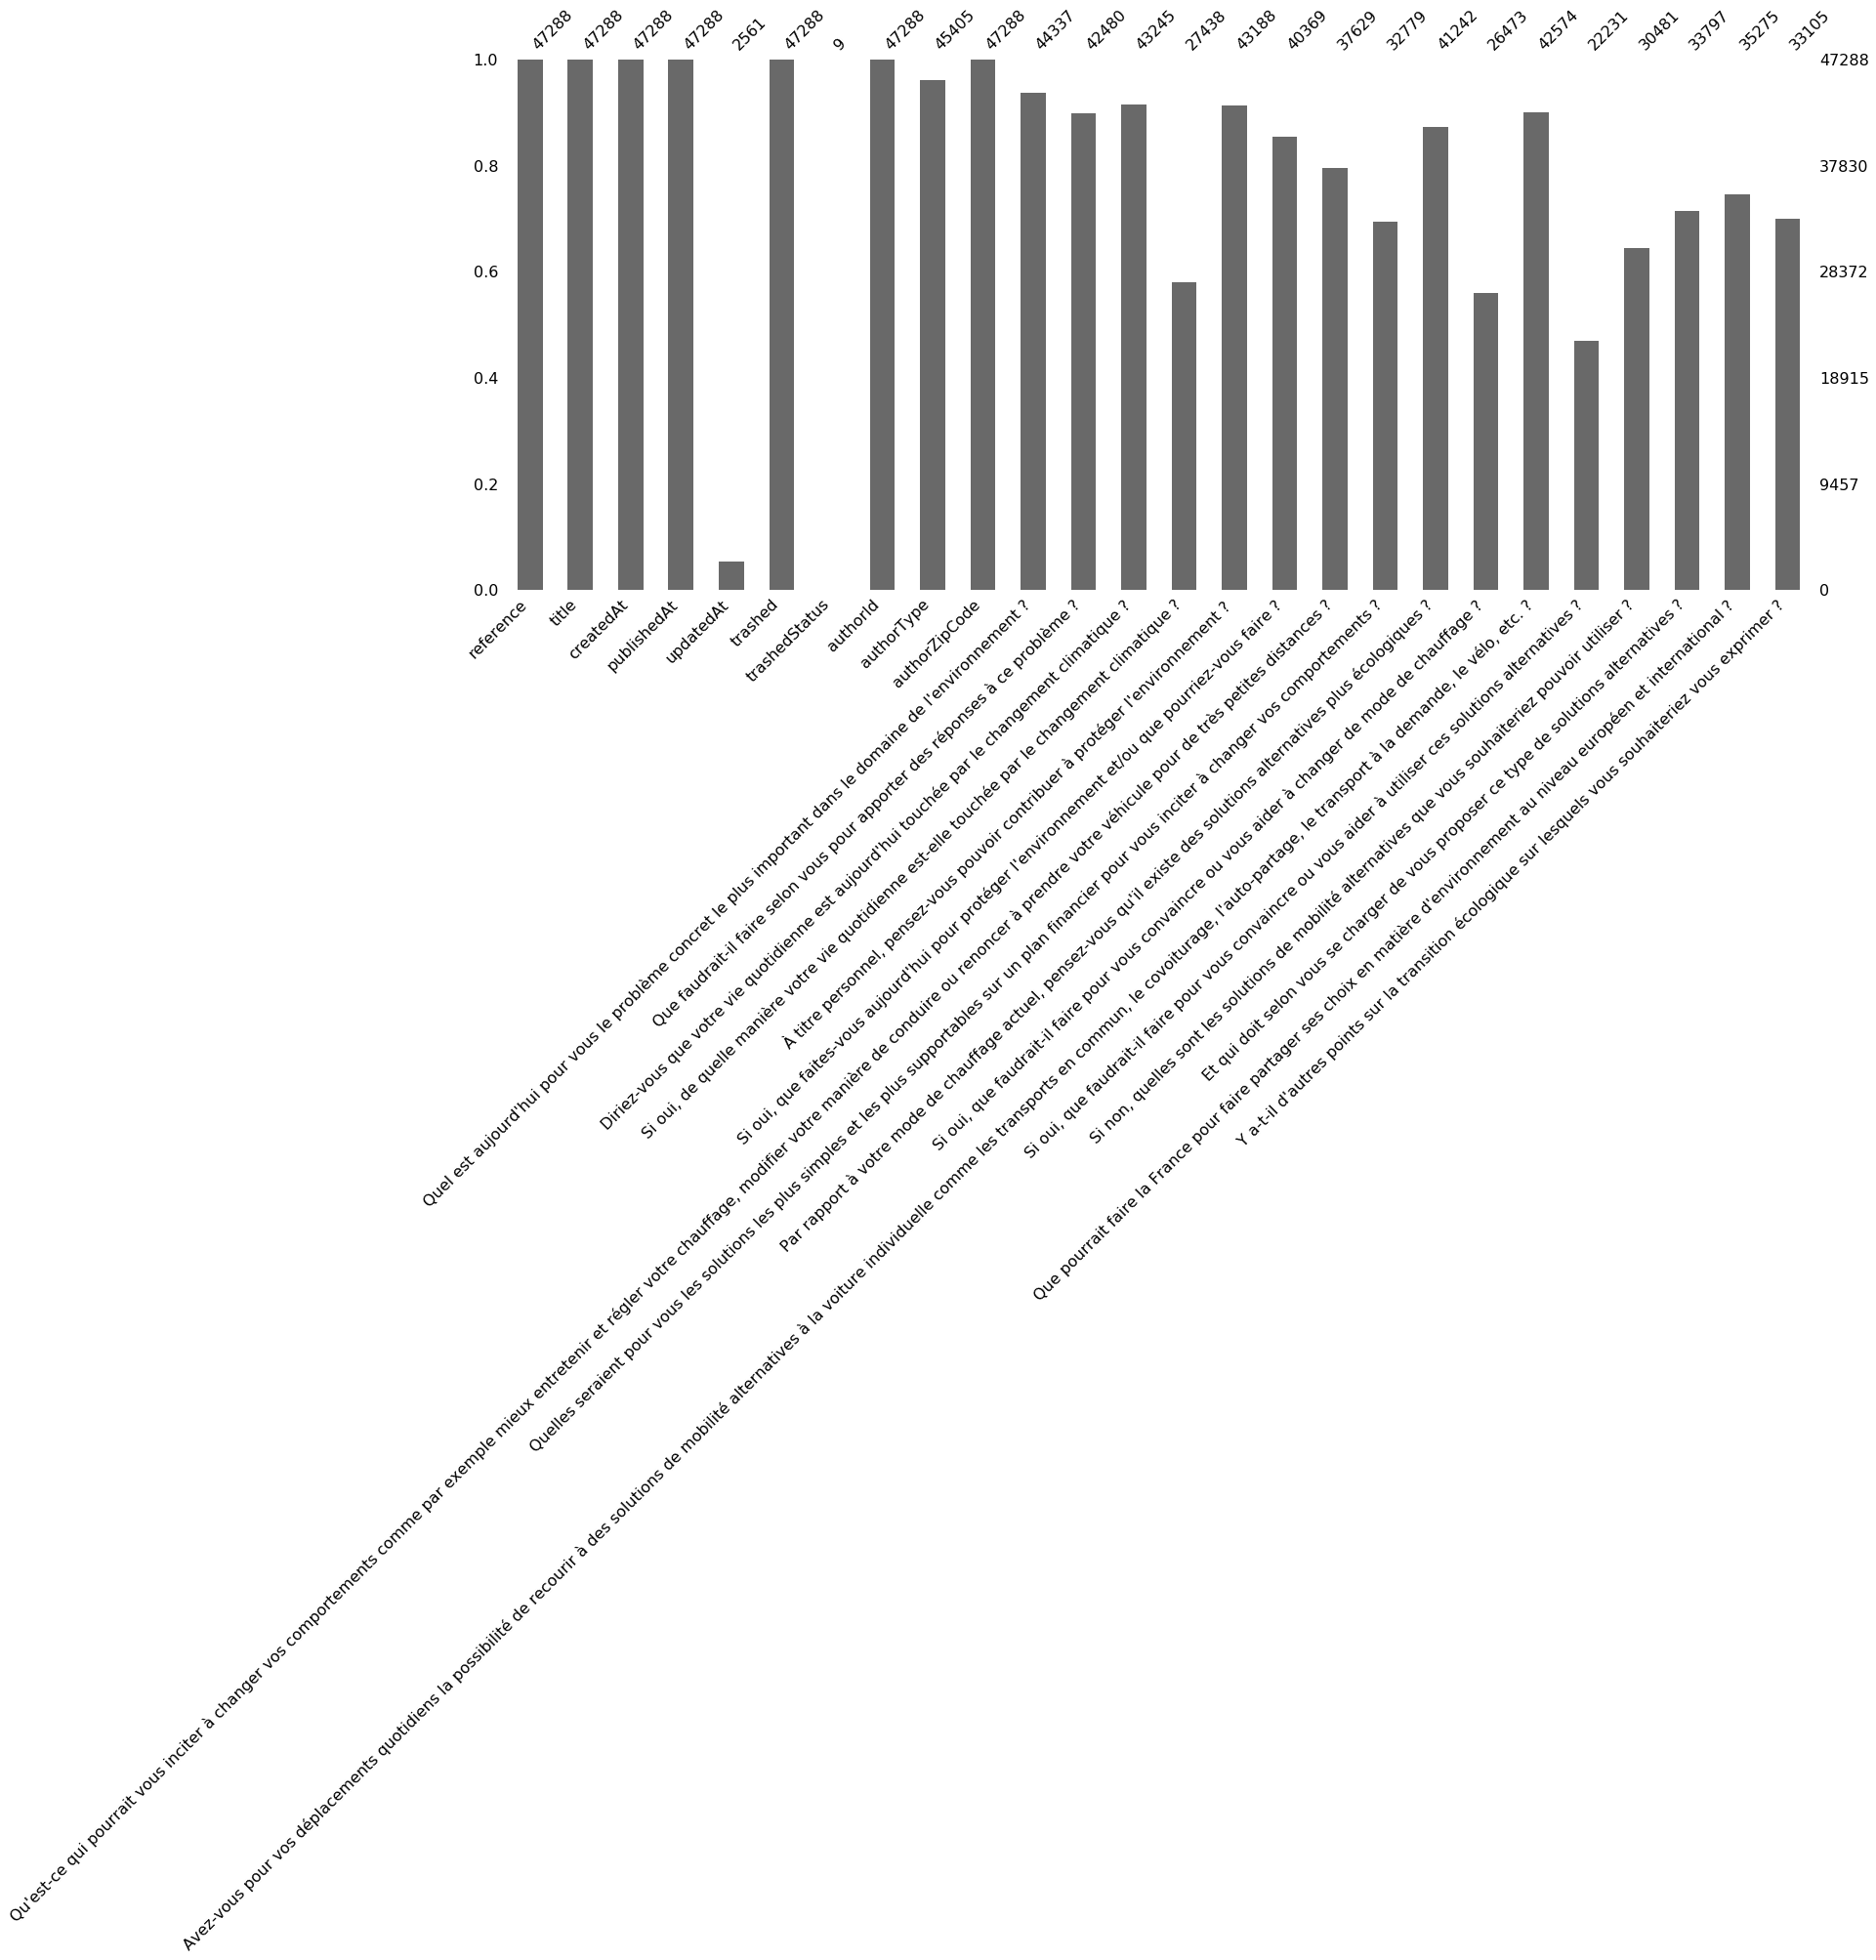

In [0]:
#NAN values
msno.bar(df)

In [0]:
#We drop all the useless columns
df.drop(['reference','createdAt','publishedAt','trashed','trashedStatus','updatedAt','authorId','authorZipCode'],axis='columns', inplace=True)

In [0]:
#We are seeing all the questions to understand the dataset 
questions = [ _.strip() for _ in list(df) if '?' in _]
questions

["Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?",
 'Que faudrait-il faire selon vous pour apporter des réponses à ce problème ?',
 "Diriez-vous que votre vie quotidienne est aujourd'hui touchée par le changement climatique ?",
 'Si oui, de quelle manière votre vie quotidienne est-elle touchée par le changement climatique ?',
 "À titre personnel, pensez-vous pouvoir contribuer à protéger l'environnement ?",
 "Si oui, que faites-vous aujourd'hui pour protéger l'environnement et/ou que pourriez-vous faire ?",
 "Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances ?",
 'Quelles seraient pour vous les solutions les plus simples et les plus supportables sur un plan financier pour vous inciter à changer vos comportements ?',
 "Par rapport à votre mode de chauff

In [0]:
df_quest = df.drop(['title','authorType'],axis='columns')

In [0]:
list(enumerate(df_quest.isnull().sum()))

[(0, 2951),
 (1, 4808),
 (2, 4043),
 (3, 19850),
 (4, 4100),
 (5, 6919),
 (6, 9659),
 (7, 14509),
 (8, 6046),
 (9, 20815),
 (10, 4714),
 (11, 25057),
 (12, 16807),
 (13, 13491),
 (14, 12013),
 (15, 14183)]

Moyenne des réponses 

In [0]:
#The average of aswer for all the questions
rep_bis = [(questions[index], (47288 - _) / 47288 *100) for index , _ in list(enumerate(df_quest.isnull().sum())) if _ != 0]
rep = [ (47288 - _) / 47288 *100 for _ in df_quest.isnull().sum() if _ != 0]
rep_bis

[("Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?",
  93.75951615631872),
 ('Que faudrait-il faire selon vous pour apporter des réponses à ce problème ?',
  89.83251564879039),
 ("Diriez-vous que votre vie quotidienne est aujourd'hui touchée par le changement climatique ?",
  91.45026222297412),
 ('Si oui, de quelle manière votre vie quotidienne est-elle touchée par le changement climatique ?',
  58.023177127389616),
 ("À titre personnel, pensez-vous pouvoir contribuer à protéger l'environnement ?",
  91.32972424293689),
 ("Si oui, que faites-vous aujourd'hui pour protéger l'environnement et/ou que pourriez-vous faire ?",
  85.36838098460497),
 ("Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances ?",
  79.57409913720183),
 ('Quelles seraient pour vous l

In [0]:
#The average of all the data 
pd.DataFrame(rep).mean()

0    76.214235
dtype: float64

Fill NaN

In [0]:
#We fill all the nan with empty string 
df_quest.fillna('',inplace=True)

In [0]:
df_fermes = df_quest.iloc[:,[2,4,8,10]]
df_quest_string = df_quest.iloc[:,[0,1,3,5,6,7,9,11,12,13,14,15]]

## Analyse des questions fermes

In [0]:
df_fermes_titles = list(df_fermes)

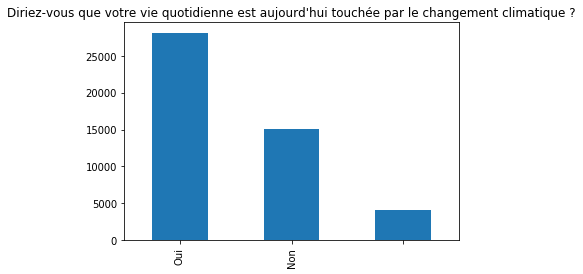

In [0]:
df_fermes.iloc[:,0].value_counts().plot(kind='bar',title=df_fermes_titles[0])

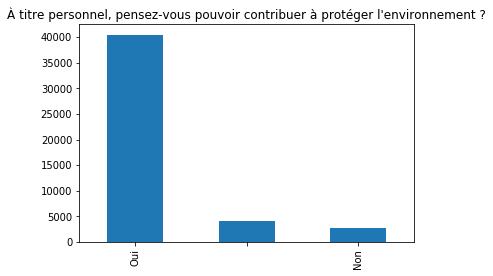

In [0]:
df_fermes.iloc[:,1].value_counts().plot(kind='bar',title=df_fermes_titles[1])

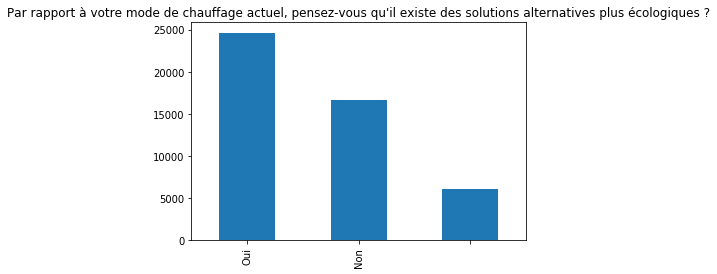

In [0]:
df_fermes.iloc[:,2].value_counts().plot(kind='bar',title = df_fermes_titles[2])

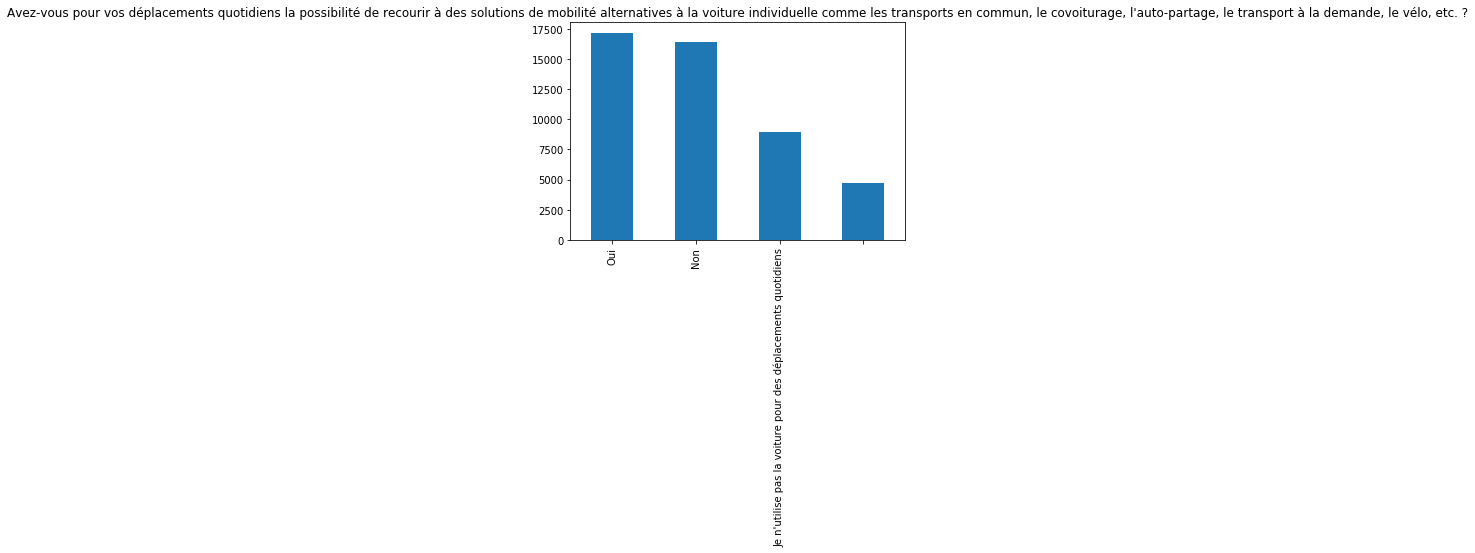

In [0]:

df_fermes.iloc[:,3].value_counts().plot(kind='bar',title = df_fermes_titles[3])

In [0]:
from IPython.display import display, HTML

import pandas as pd
import altair as alt


df_bis.drop([
    "Et qui doit selon vous se charger de vous proposer ce type de solutions alternatives ?",
    "Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?",
    "Qu'est-ce qui pourrait vous inciter à changer vos comportements comme par exemple mieux entretenir et régler votre chauffage, modifier votre manière de conduire ou renoncer à prendre votre véhicule pour de très petites distances ?",
    "Que faudrait-il faire selon vous pour apporter des réponses à ce problème ?",
    "Que pourrait faire la France pour faire partager ses choix en matière d'environnement au niveau européen et international ?",
    "Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?",
    "Quelles seraient pour vous les solutions les plus simples et les plus supportables sur un plan financier pour vous inciter à changer vos comportements ?",
    "Si oui, de quelle manière votre vie quotidienne est-elle touchée par le changement climatique ?",
    "Si oui, que faites-vous aujourd'hui pour protéger l'environnement et/ou que pourriez-vous faire ?",
    "Si oui, que faudrait-il faire pour vous convaincre ou vous aider à utiliser ces solutions alternatives ?",
    "Si oui, que faudrait-il faire pour vous convaincre ou vous aider à changer de mode de chauffage ?",
    "Si non, quelles sont les solutions de mobilité alternatives que vous souhaiteriez pouvoir utiliser ?"
    ],
    axis=1,
    errors="ignore",
    inplace=True
)

df_bis = df_bis.melt(
    id_vars=["reference", "title", "createdAt", "publishedAt", "updatedAt", "trashed", "trashedStatus", "authorId", "authorType", "authorZipCode"],
    var_name="question",
    value_name="reponse"
)

brut = df_bis.groupby(["question", "reponse"]).count()

brut.drop(brut.columns.difference(['reference']), axis=1, inplace=True)

In [0]:
df_bis.head()

,reference,title,createdAt,publishedAt,updatedAt,trashed,trashedStatus,authorId,authorType,authorZipCode,question,reponse
0,2-4,transition écologique,2019-01-22 09:37:49,2019-01-22 09:37:49,NaN,False,NaN,VXNlcjoxMTQwMTc0YS0xZTFmLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,97231,Diriez-vous que votre vie quotidienne est aujo...,NaN
1,2-5,La surpopulation,2019-01-22 09:39:33,2019-01-22 09:39:33,NaN,False,NaN,VXNlcjpjOWYxZWQ1NS0xYzEwLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,57000,Diriez-vous que votre vie quotidienne est aujo...,NaN
2,2-6,climat,2019-01-22 09:39:50,2019-01-22 09:39:50,NaN,False,NaN,VXNlcjozZjlhNzAwOS0xYTc2LTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,34140,Diriez-vous que votre vie quotidienne est aujo...,Non
3,2-7,POLLUTION AIR EAU,2019-01-22 09:40:19,2019-01-22 09:40:19,NaN,False,NaN,VXNlcjozOWQwNzJjNC0xZDEwLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,17400,Diriez-vous que votre vie quotidienne est aujo...,Non
4,2-8,Economie vs Ecologie,2019-01-22 09:41:33,2019-01-22 09:41:33,NaN,False,NaN,VXNlcjo3M2YxN2NlZS0xZDRiLTExZTktOTRkMi1mYTE2M2...,Citoyen / Citoyenne,35430,Diriez-vous que votre vie quotidienne est aujo...,Oui


In [0]:
pct = brut.groupby(level=0).apply(lambda x: 100 * x / float(x["reference"].sum()))

pct

reference
question                                           reponse                                                      
Avez-vous pour vos déplacements quotidiens la p... Je n'utilise pas la voiture pour des déplacemen...  21.071546
                                                   Non                                                 38.542303
                                                   Oui                                                 40.386151
Diriez-vous que votre vie quotidienne est aujou... Non                                                 34.917331
                                                   Oui                                                 65.082669
Par rapport à votre mode de chauffage actuel, p... Non                                                 40.272053
                                                   Oui                                                 59.727947
À titre personnel, pensez-vous pouvoir contribu... Non                                                  6.311939
                                                   Oui                                                 93.688061

In [0]:
for q,d in brut.groupby(level=[0]):
    
    display(HTML("<h3>%s</h3>" % q))
    
    d = d.apply(lambda x: 100 * x / float(x.sum()))
        
    chart = alt.Chart(d.reset_index()).mark_bar().encode(
        x="reference:Q",
        y="reponse:N",
        color="reponse:N",
    )
    
    display(chart)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

## Analyse des questions ouvertes

In [0]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
#!pip install gensim
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
from nltk.corpus import stopwords
stops = set(stopwords.words('french'))
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import re
from collections import defaultdict
import matplotlib.pyplot as plt
from gensim.summarization import summarize
#maL = tokenizer.tokenize(str)

Traiment et mise en place des donnees

In [0]:
def preProcess(text):
    text = re.sub(r'[^\w\s]','',text) # remove punctuation
    list_word = tokenizer.tokenize(text.lower()) # tokenize all the data 
    list_word_stops = [ _ for _ in list_word if _ not in stops] #remove all the stop word
    list_lemma = [lemmatizer.lemmatize(word) for word in list_word_stops]
    list3 = []
    for value  in list_lemma:
      list3.append(value)
    return ' '.join(list3)

In [0]:
def preProcess_occu(text):
    text = re.sub(r'[^\w\s]','',text) # remove punctuation
    list_word = tokenizer.tokenize(text.lower()) # tokenize all the data 
    list_word_stops = [ _ for _ in list_word if _ not in stops] #remove all the stop word
    list_lemma = [lemmatizer.lemmatize(word) for word in list_word_stops]
    occu = occurenceWords(list_lemma)
    list3 = []
    for value , i  in occu:
      list3.append(value)
    return ' '.join(list3)

In [0]:
def occurenceWords(words):
    dico = defaultdict(int)
    for word in words:
        dico[word]+=1
    return sorted(dico.items(),key =lambda x: x[1], reverse= True)[:200]

In [0]:
#analyse the most important words for each question 
questions_string = list(df_quest_string)
my_df = pd.DataFrame(columns=['question','responses'])
for i in range(0,df_quest_string.shape[1]):
  print(i)
  text = ' '.join(df_quest_string.iloc[:,i].tolist()).strip()
  text_proc = preProcess_occu(text)
  my_df = my_df.append({'question':str(questions_string[i]),'responses':text_proc},ignore_index=True)

0
1
2
3
4
5
6
7
8
9
10
11


In [0]:
print(my_df.iloc[0]["question"])
print(my_df.iloc[0]["responses"])

Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?
climatiques dérèglements sécheresse crue pollution lair biodiversité disparition espèces certaines tous tout plus problèmes climatique toutes a sol déchets problème cest liés important leau importants littoral lié ressources autres lérosion lenvironnement faut dérèglement 4 planète proposition non être terre aussi réchauffement pesticide produits consommation sans lensemble peut faire vie car plastique point air nest fait donc question cela trop écologique réponses surconsommation eau ny production cause nature comme humaine ensemble bien etc santé fois france entre pay global transport océans cidessus transition gaspillage sujets conséquences gestion doit très mode moins lhomme si manque cette lagriculture choisir naturelles population surpopulation monde dun nucléaire quatre dune climat liées mondiale chimiques cités eaux terres général solution choix prendre compte un temp destr

In [0]:
my_df.iloc[0]

question     Quel est aujourd'hui pour vous le problème con...
responses    climatiques dérèglements sécheresse crue pollu...
Name: 0, dtype: object

In [0]:
# create 2 dataframe 
questions_string = list(df_quest_string) 
my_df_sentences = pd.DataFrame(columns=['question','responses'])
my_df_sentences_preprocess = pd.DataFrame(columns=['question','responses'])
for i in range(0,df_quest_string.shape[1]):
  print(i)
  text = ' '.join(df_quest_string.iloc[:,i].tolist()).strip()
  my_df_sentences = my_df_sentences.append({'question':str(questions_string[i]),'responses':text},ignore_index=True)
  my_df_sentences_preprocess = my_df_sentences_preprocess.append({'question':str(questions_string[i]),'responses':preProcess(text)},ignore_index=True)

0
1
2
3
4
5
6
7
8
9
10
11


SUMMARIES :

In [0]:
print("Question : " + my_df_sentences["question"][1])
print("")
print("Summary : " + summarize(my_df_sentences["responses"][1][:100000],word_count = 100)[84:])


Question : Que faudrait-il faire selon vous pour apporter des réponses à ce problème ?

Summary :  Sortir de la société de consommation, favoriser le réutilisable, le réemployable, réduire notre consommation d'énergie fossiles, se passer des climatisations, éviter de surchauffer son habitation, développer l'emploi local, limiter les importations de produits manufacturés, de fruits, légumes … produire local surtaxer le kérozène pour les avions et le fioul lourd, mettre tous les camions sur des trains sur les grands axes et surtaxer les camions étrangers qui ne font que traverser la France Developper l'agriculture bio, interdire les pesticides Prendre en compte le réel pour que l'action humaine, quelque que soit son échelle, s’inscrive dans les limites du réel spatial et temporel et dans le respect de chaque être humain.


In [0]:
print("Question : " + my_df_sentences["question"][2])
print("")
print("Summary : " + summarize(my_df_sentences["responses"][2][:100000],word_count = 100).strip())

Question : Si oui, de quelle manière votre vie quotidienne est-elle touchée par le changement climatique ?

Summary : Problèmes de santé l'hiver dus à la pollution Augmentation du nombre de phénomène climatique dangereux, canicule, sécheresse entraînant une détérioration des sols avec une incidence direct sur la structure des habitats  Je constate chaque année l'érosion inquiétante de nos côtes   pollution Disparition des saisons bien identifiées, plus de pathologies respiratoires  Périodes de canicule, tempêtes Le changement climatique ne se résume à quelques catastrophes naturelles qui touchent un petit pourcentage de la population.


In [0]:
print("Question : " + my_df_sentences["question"][5])
print("")
print("Summary : " + summarize(my_df_sentences["responses"][5][:100000],word_count = 100).strip())

Question : Quelles seraient pour vous les solutions les plus simples et les plus supportables sur un plan financier pour vous inciter à changer vos comportements ?

Summary : Mettre de emplace de cota  renchérir le cout des énergies fossiles mais flécher ces recettes fiscale en totalité sur la transition énergétique panneaux solaires mais ils doivent être plus éfficaces et quid dans les régions du nord baisse des prix des transports en commun, baisse des prix du chauffage écologique, baisse des prix du sac de granule de granule de bois, plus de bus Cuts/Noyon Plus de pub qui incite à acheter des objets qui détruise l’environnement  réduction d'impots crédit d’impôt pour installation individuelle   S'il s'agit de payer davantage, aucune mesure ne sera incitatoire : l'écologie punitive est la pire des choses et la moins bien acceptée.


In [0]:
print("Question : " + my_df_sentences["question"][11])
print("")
print("Summary : " + summarize(my_df_sentences["responses"][11][:100000],word_count = 100).strip())

Question : Y a-t-il d'autres points sur la transition écologique sur lesquels vous souhaiteriez vous exprimer ?

Summary : Aujourd'hui, la location des batteries est aussi un frein à l'achat de ces véhicules, un petit rouleur verra son portefeuille encore plus emputé en passant à l'electrique, 69 euros de location de batterie + 6-10 euros en électricité pour recharge en moyenne par mois, quand avant il faisait 1 plein de citadine mensuellement, le gain n'existe pas dans cette situation.
-	Supprimer toutes les taxes sur les produits alimentaires, par exemple la taxe sur l’huile pour obliger les gens à acheter du beurre, on ne met pas de beurre dans les salades, et pour la santé afin d’éviter le cholestérol, tous les médecins conseillent de l’huile de pépins de raisins, or c’est l’huile la plus chère, ca veut dire que quand on est pauvre, on doit en plus être malade …..


In [0]:

STOPWORDS_0 = ["moin","moins","tous","sans","toute","cela","plus","autres","france","faire","fait","exemple","comme","commun","faut","aussi","donc","tout","tou","san","etc","si","bien","non","car","cest"]



Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?


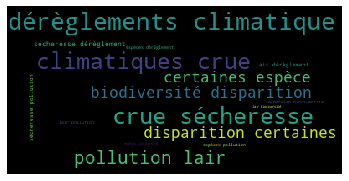

In [0]:
## Simple visualtion
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text,stps): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(
                          relative_scaling = 1.0,
                          stopwords = stps # set or space-separated string
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("")
print(my_df_sentences_preprocess.iloc[0]["question"])
generate_wordcloud(my_df_sentences_preprocess.iloc[0]["responses"],STOPWORDS_0)


LDA

In [0]:
from gensim import corpora, models
def doLDA(myList):
  dictionary = corpora.Dictionary(myList)
  corpus = [dictionary.doc2bow(cleandoc) for cleandoc in myList]
  ldamodel = models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary)
  print(ldamodel.print_topics(num_topics=4, num_words=5))

In [0]:
lda_liste = []
for i in range(0,my_df_sentences_preprocess.shape[0]):
  myList = tokenizer.tokenize(my_df_sentences_preprocess["responses"][i][:10000].lower())
  lda_liste.append(myList)
print(lda_liste)
doLDA(lda_liste)

[['problèmes', 'auxquels', 'trouve', 'confronté', 'lensemble', 'planète', 'dénoncent', 'plus', 'parfait', 'désordre', 'gilets', 'jaunes', 'france', 'sontils', 'dus', 'avant', 'tout', 'surpopulation', 'mondiale', 'cette', 'population', 'passée', 'd15', 'milliard', 'dhabitants', '1900', '7', 'milliard', '2020', 'montera', 'bientôt', '10', 'milliard', 'vers', '2040', 'progrès', 'communication', 'village', 'mondial', 'chaque', 'individu', 'fin', 'fond', 'lasie', 'fin', 'fond', 'lafrique', 'passant', 'quartiers', 'campagnes', 'pay', 'aspire', 'vivre', 'peu', 'len', 'blâmer', 'comme', 'moins', 'mal', 'loti', 'concitoyens', 'logement', 'nourriture', 'biens', 'consommation', 'déplacementetc', 'voilà', 'mère', 'tous', 'problèmes', 'si', 'tel', 'bien', 'ca', 'solution', 'tous', 'problèmes', 'stabilisation', 'croissance', 'démographique', 'partage', 'riches', 'partage', 'terres', 'partage', 'leau', 'protection', 'biodiversité', 'règlement', 'conflits', 'lutte', 'contre', 'déforestation', 'lutte',

On remarque que les citoyens veulent utiliser + le vélo et le covoiturage. De plus, ils veulent que le prix des transport publics diminuent.

In [0]:

myList = tokenizer.tokenize(my_df_sentences_preprocess["responses"][2][:10000].lower())
print(myList)

['pollution', 'lair', 'pollution', 'aliment', 'maladie', 'chronique', 'entourage', 'maladie', 'digestive', 'réchauffement', 'climatique', 'évident', 'températures', 'hausse', 'permanente', 'changements', 'brutaux', 'dun', 'point', 'vue', 'météo', 'trés', 'gros', 'orages', 'question', 'mal', 'posée', 'avis', 'climat', 'qualité', 'lair', 'nest', 'selon', 'météo', 'sécheresse', 'neige', 'hiver', 'faire', 'ski', 'dessous', '1300', 'climat', 'devient', 'plus', 'chaud', 'supportons', 'moins', 'moins', 'cette', 'chaleur', 'pollution', 'atmosphérique', 'provoque', 'problèmes', 'respiration', 'allergy', 'catastrophe', 'pollution', 'vois', 'plus', 'dabeille', 'doiseau', 'lair', 'température', 'sécheresses', 'pollution', 'ville', 'quasi', 'quotidienne', 'pollution', 'auditive', 'voitures', 'circulation', 'sans', 'fin', 'nuit', 'jour', 'gêne', 'mode', 'transport', 'doux', 'rend', 'dangereux', 'épisodes', 'climatiques', 'violents', 'tempêtes', 'pluies', 'morts', 'clé', 'nourriture', 'dangereuse', '

Announcement of macron 

In [0]:
announces = ["Les 150 citoyens devront définit des mesures concrètes en matière de transition climatique",
            "Un Conseil de défense écolo réunira PM, grands opérateurs de l'Etat et ministres pour mettre l'urgence climatique au coeur de totes les politiques",
            "Le président a évoqué l'horizon 2025 « pour donner de la clarté sur toutes nos actions »."]

T-SNE

In [0]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
STOP_WORDS = nltk.corpus.stopwords.words()

In [0]:
def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    
    sentence = regex.sub('', val).lower()
    sentence = re.sub(r'[^\w\s]','',sentence) # remove punctuation
    sentence = tokenizer.tokenize(sentence.lower()) # tokenize all the data 
    sentence = [lemmatizer.lemmatize(word) for word in sentence]

    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    data = data.apply(clean_sentence)
    
    return data

In [0]:
data = clean_dataframe(df_quest_string[questions[0]] )
data.head(5)

0                                                     
1    problèmes auxquels trouve confronté lensemble ...
2             dérèglements climatiques crue sécheresse
3                                       pollution lair
4           biodiversité disparition certaines espèces
Name: Quel est aujourd'hui pour vous le problème concret le plus important dans le domaine de l'environnement ?, dtype: object

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    print(len(model.wv.vocab))
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    print("Nombre: " + str(len(x)))
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [0]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []


    for sentence in data.iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
            
    return corpus

In [0]:
corpus = build_corpus(data)
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4) ## methode de vectorisation        

In [0]:
len(model.wv.vocab)

89

In [0]:
type(model)

gensim.models.word2vec.Word2Vec

89


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


Nombre: 89


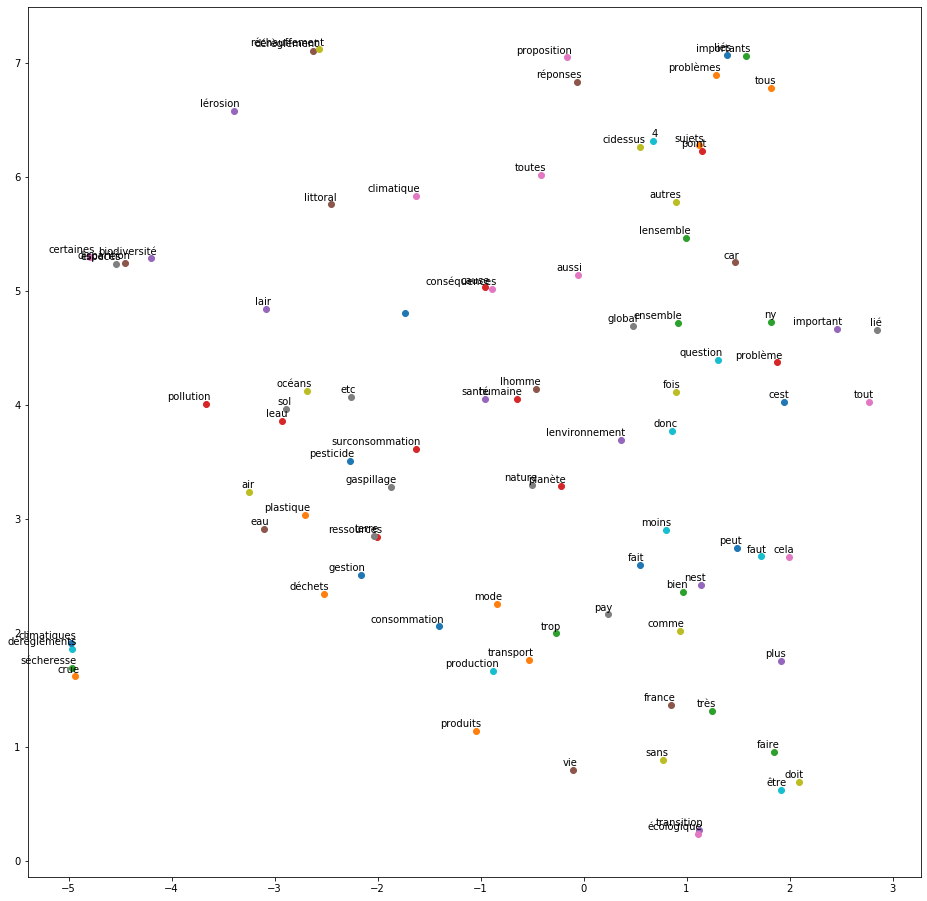

In [0]:
tsne_plot(model)